### Learning strategy
- Do not use all nearby words, but one per each training

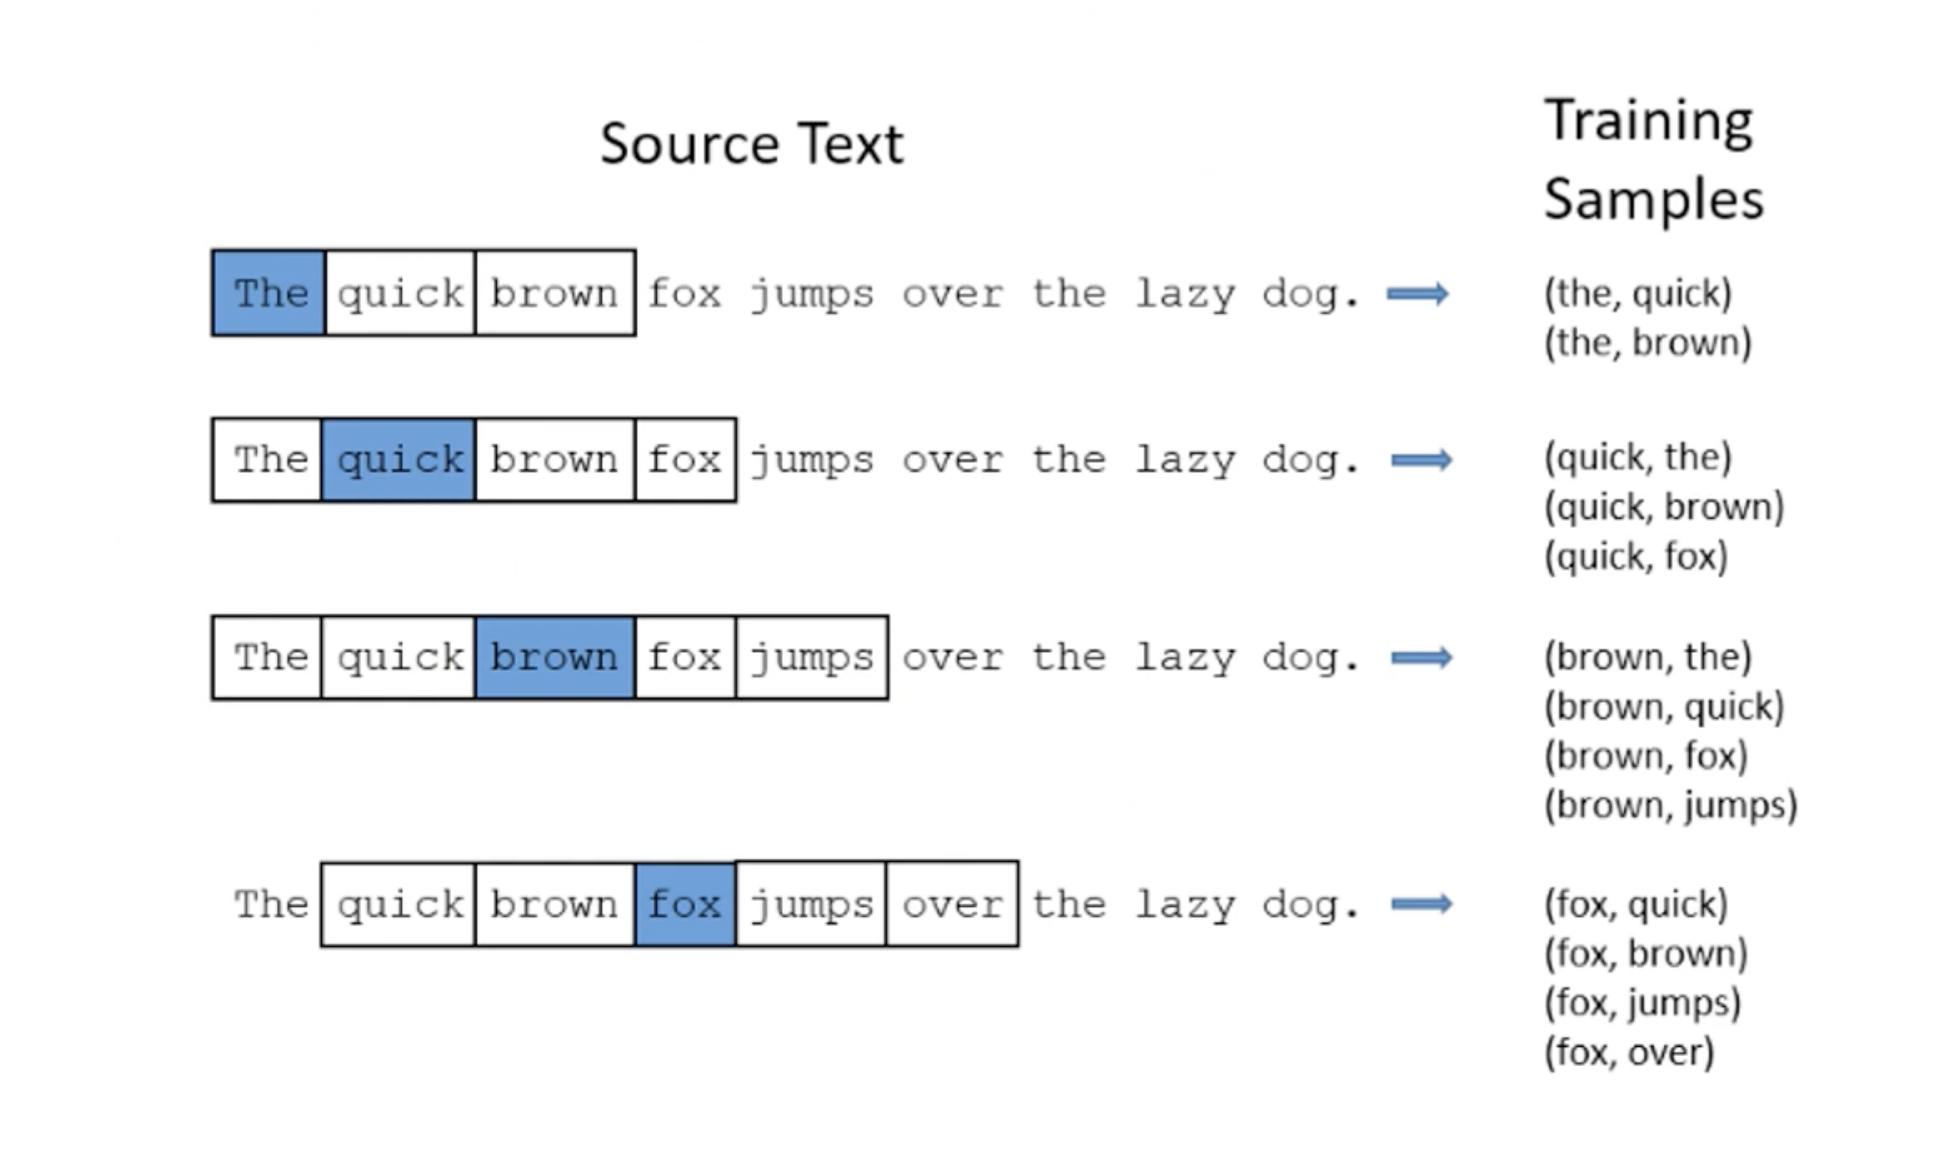

무슨 의미인지 그림 맨 아래에 있는 예시로 설명드리겠습니다.  
'fox'가 center가 되고, 'quick'이 output이 되는 모형을 학습을 시키고 이런 식으로 하나씩 pairwise로 해도 원래 가지고 있는 Skip-gram의 의미랑 똑같다는 의미입니다. Neural network를 이해하고 있다면 한꺼번에 gradient를 흘려서 더하나, 개별적으로 gradient를 흘려서 따로 더하나 계산이 같은 것을 알고 있어서 하나씩 pairwise로 학습을 하라는 의미였습니다!

### The number of weights to be trained: 2 × V × N (Huge network!)  
- ***Word pairs and phrases***
   - Treating common word pairs or phrases as single "word"  

- ***Subsampling frequent words***
   - To decrease the number of training examples
   - The probability of words $w_i$ being removed

$$ P(w_i) = 1 - \sqrt{\frac{t}{f(w_i)}} $$  

$$ if f(w_i) = 10^{-4}, P(w_i) = 1 - \sqrt{\frac{1}{10}} = 0.6838 $$   
<center>특정 단어가 corpus에서 등장하는 빈도가 $10^{-4}$이면 학습에 누락될 확률이 0.6838이라는 뜻입니다.</center>

$$ if f(w_i) = 10^{-2}, P(w_i) = 1 - \sqrt{\frac{1}{1000}} = 0.9684 $$

- ***Negative sampling***  
   - Instead of updating the weights associated with all output words, update the weight of a few (5-20) words   
   무슨 의미냐면 output 단어의 확률을 계산하기 위해서는 corpus에 존재하는 모든 단어들에 대한 softmax를 계산해야 한다는 뜻입니다.

$$ J(θ) = \frac{1}{T}\sum_{t=1}^T\sum_{-m≤j≤m,j≠0} logp(w_{t+j}|w_t) = \frac{1}{T}\sum_{t=1}^TJ_t(θ) $$  

$$J_t(θ) = logσ(u_o^Tv_c) + \sum_{i=1}^kE_{i\sim p(w)}[logσ(-u_i^Tv_c)]       $$  

$$ P(w_i) = \frac{f(w_i)^{3/4}}{\sum_{j=0}^n(f(w_i)^{3/4})} $$

### Negative Sampling Example

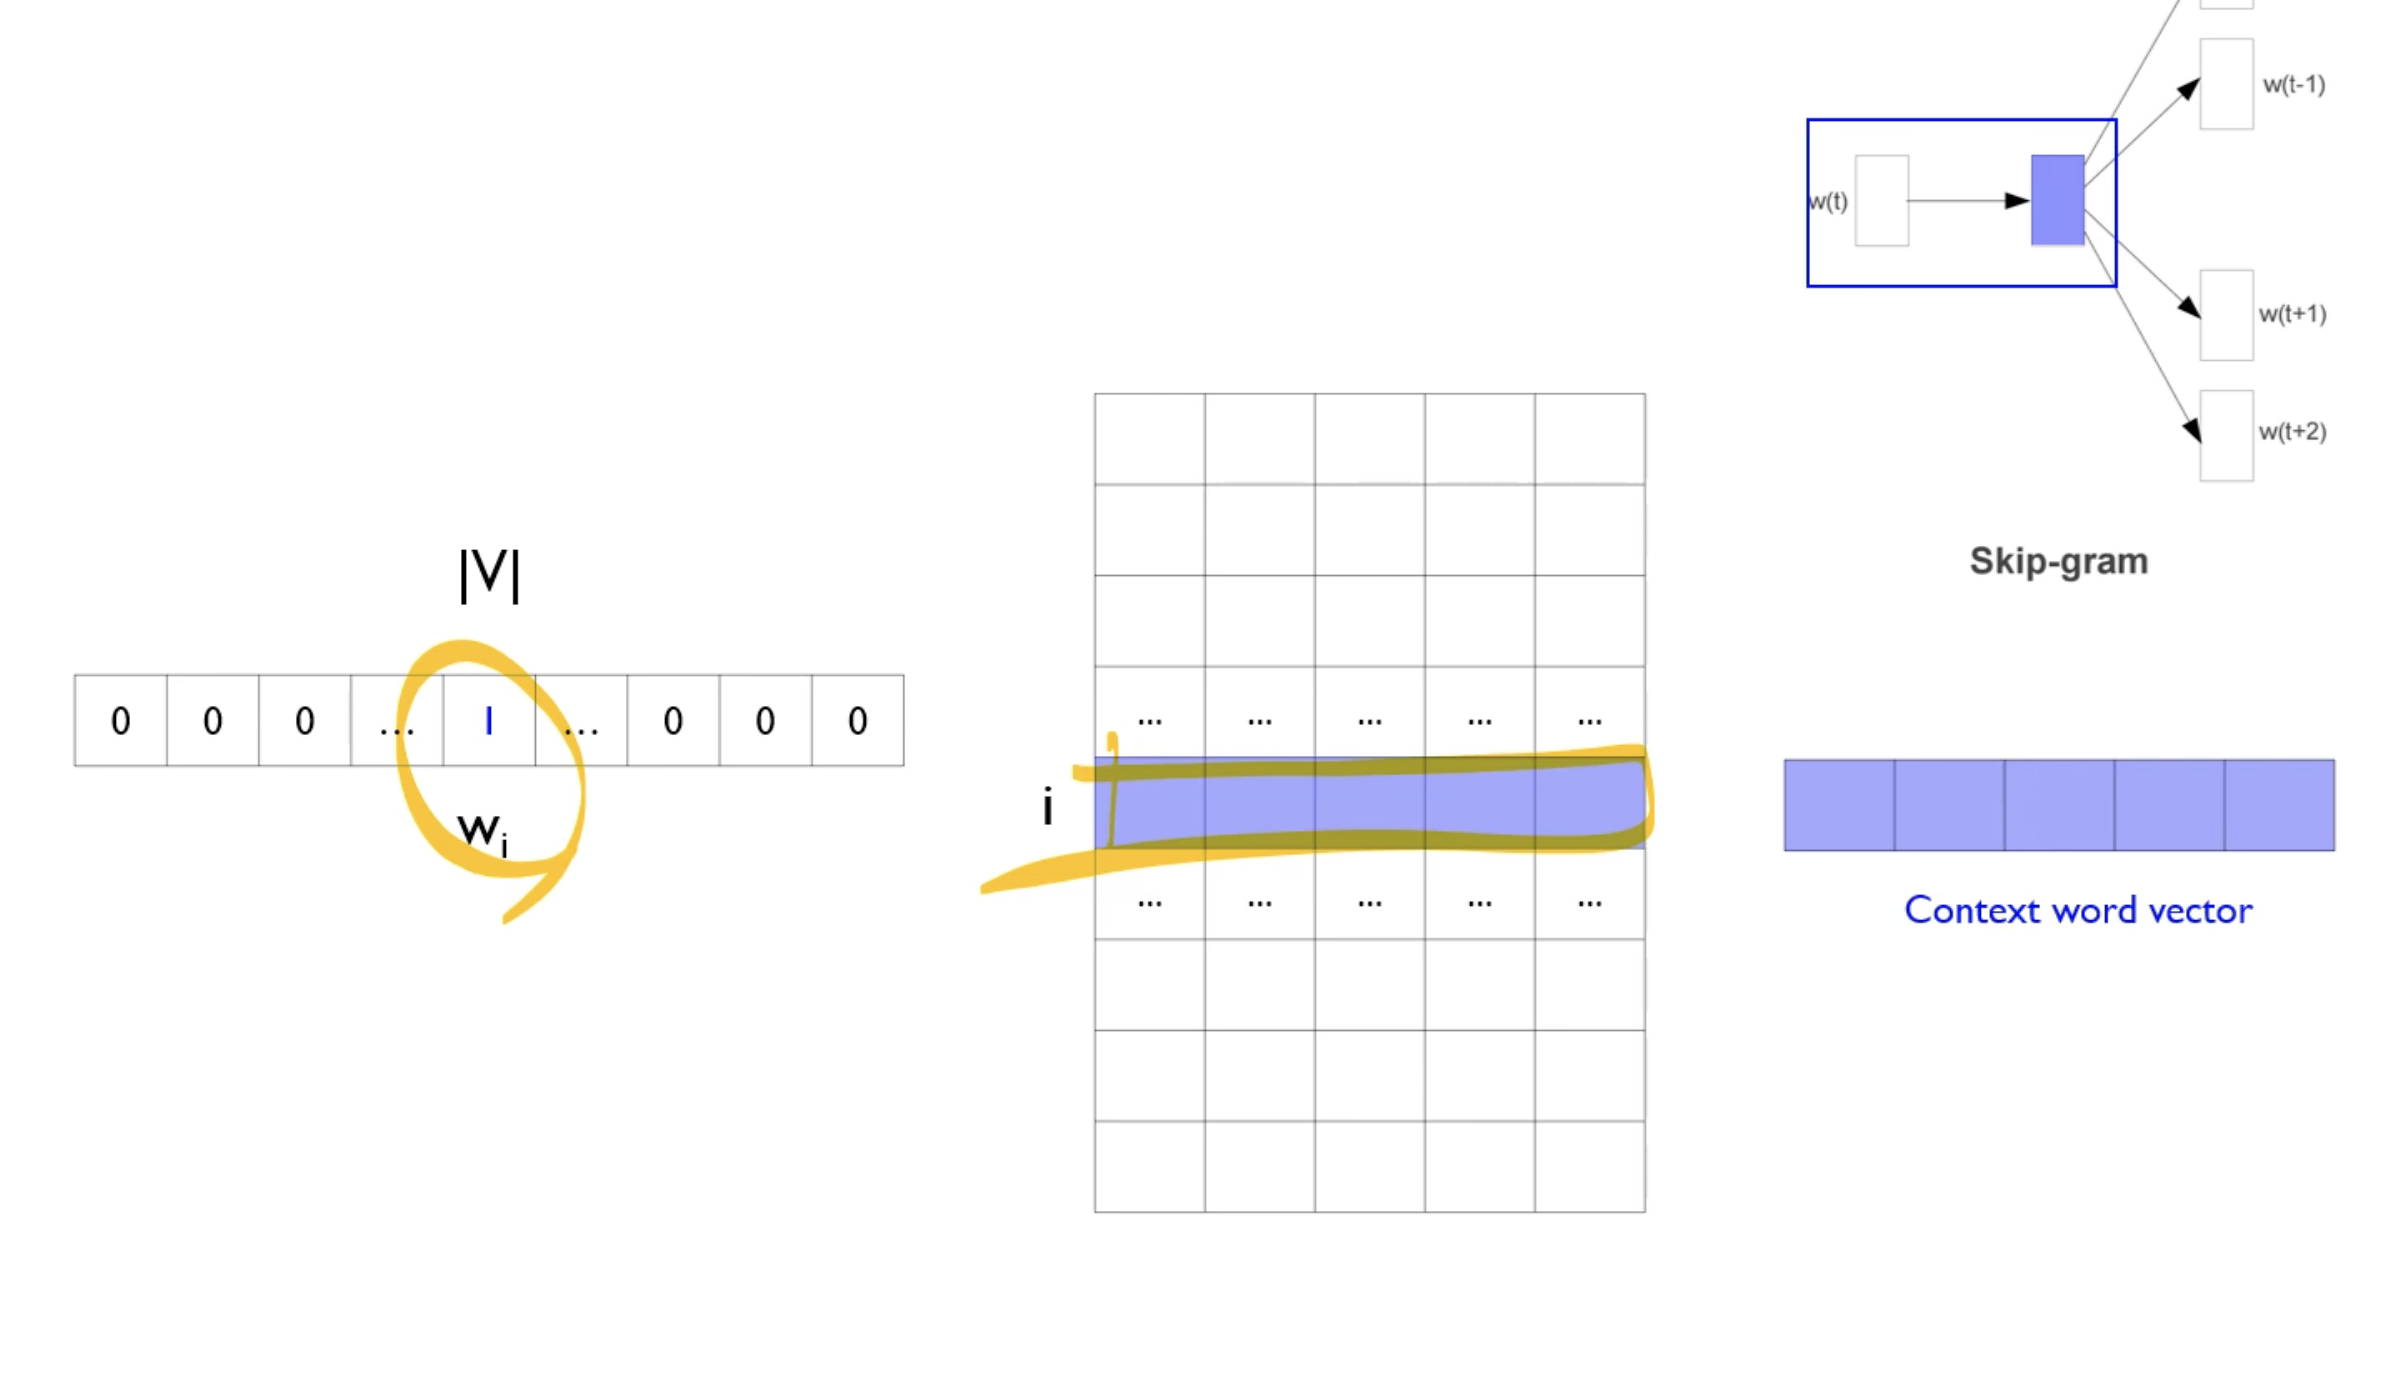

어떤 i번째 단어와 해당 context가 주어졌고, output이 존재해야 합니다.  
i번째 단어에 대해서 lookup table을 통해 Context vector를 찾았습니다.



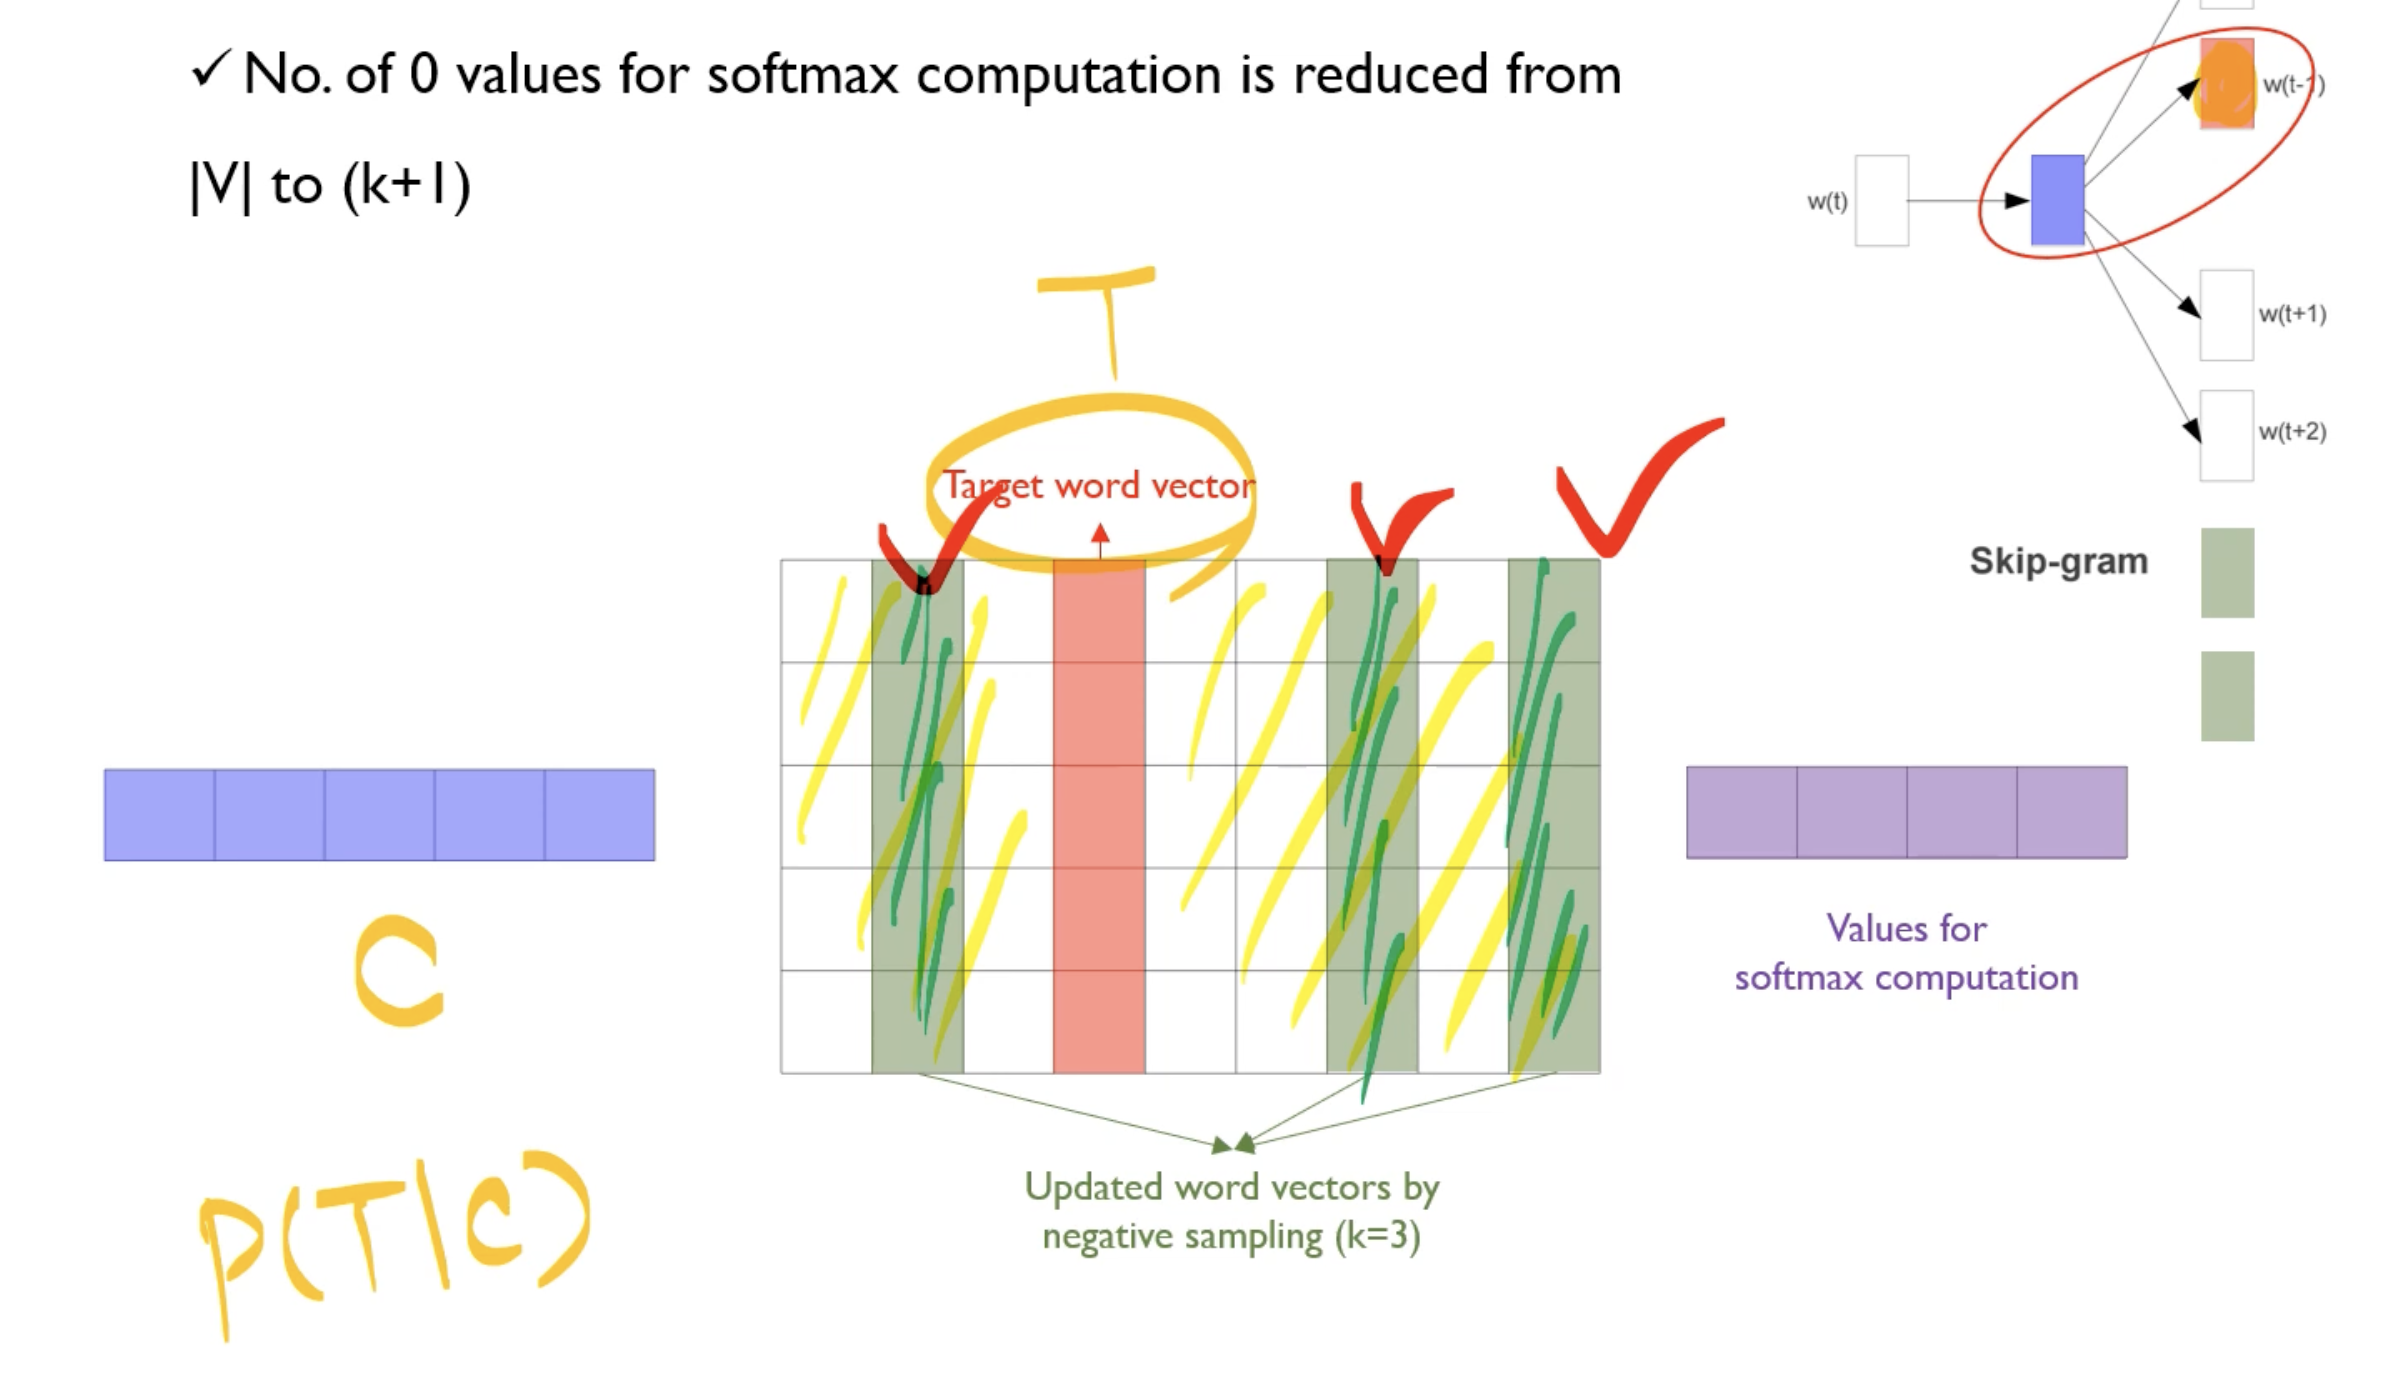

이렇게 찾은 Context vector를 가지고 target 단어가 존재한다면, 이 단어(Target word vector)가 발생할 확률을 계산해야 합니다.  
Target word vector에 대한 확률값을 centerword가 주어졌을 때, Target word가 나타날 확률값 $P(T|C)$를 정확하게 계산하기 위해선 Target word에 대한 내적값뿐만 아니라 나머지 모든 단어들에 대해서도 내적값을 다 구한 다음에 softmax를 계산해야 한다는 의미입니다.  
요약하자면 그 계산이 시간적으로 오래 걸리니까 일부분(초록색)의 단어들에 대해서만 sampling을 해서(Negative sampling) 계산의 효율성을 추구하자는 뜻입니다!